<a href="https://colab.research.google.com/github/Aadityapritam/Covid_19_Xray_image_pediction/blob/master/covid19_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://cb.lk/covid_19

--2020-06-02 03:53:34--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-06-02 03:53:35--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-06-02 03:53:36--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-06-02 03:53:36--  https://www.dropbox.com/s/raw/7rjw

In [0]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.models import Model
from keras.preprocessing import image
from keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications.imagenet_utils import preprocess_input

In [0]:
def creating_model(input_shape):
  x_input=Input(input_shape)
  mod=Conv2D(32,(3,3),strides=(1,1),activation='relu', name='conv1')(x_input)
  mod=Conv2D(64,(3,3),strides=(1,1),activation='relu',name='conv2')(mod)
  mod=MaxPooling2D((2,2),name='maxPooling1')(mod)
  mod=Dropout((0.5))(mod)

  mod=Conv2D(128,(3,3),strides=(1,1), activation='relu',name='conv3')(mod)
  mod=MaxPooling2D((2,2),name='maxPooling2')(mod)
  mod=Dropout((0.25))(mod)

  mod=Flatten()(mod)
  mod=Dense(64, activation='relu')(mod)
  mod=Dense(1,activation='sigmoid')(mod)

  model=Model(inputs=x_input, outputs=mod, name='covid-19_detection_model')

  return model

In [0]:
covid_model=creating_model((224,224,3))
covid_model.summary()

Model: "covid-19_detection_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 222, 222, 32)      896       
_________________________________________________________________
conv2 (Conv2D)               (None, 220, 220, 64)      18496     
_________________________________________________________________
maxPooling1 (MaxPooling2D)   (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv3 (Conv2D)               (None, 108, 108, 128)     73856     
_________________________________________________________________
maxPooling2 (MaxPooling2D)   (None, 54, 54

In [0]:
covid_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
  )

test_dataset=image.ImageDataGenerator(rescale=1./255)


In [0]:
train_generator=train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 224 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
validation_generator=test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 60 images belonging to 2 classes.


In [0]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
hist=covid_model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=2,
    verbose=1
)

Epoch 1/5
8/8 [==============================] - 10s 1s/step - loss: 0.0535 - accuracy: 0.9883 - val_loss: 0.2533 - val_accuracy: 0.9167
Epoch 2/5
8/8 [==============================] - 11s 1s/step - loss: 0.0532 - accuracy: 0.9805 - val_loss: 0.7214 - val_accuracy: 0.6167
Epoch 3/5
8/8 [==============================] - 10s 1s/step - loss: 0.1318 - accuracy: 0.9570 - val_loss: 0.0341 - val_accuracy: 0.9667
Epoch 4/5
8/8 [==============================] - 10s 1s/step - loss: 0.1103 - accuracy: 0.9648 - val_loss: 0.4836 - val_accuracy: 0.6667
Epoch 5/5
8/8 [==============================] - 11s 1s/step - loss: 0.0740 - accuracy: 0.9727 - val_loss: 0.2370 - val_accuracy: 0.9667


In [0]:
covid_model.save("/content/covid_Xray_model.h5")

In [0]:
covid_model.evaluate_generator(train_generator)

[0.2767261266708374, 0.9196428656578064]

In [0]:
covid_model.evaluate_generator(validation_generator)

[0.23703445494174957, 0.9666666388511658]

In [0]:
from keras import models
our_model=models.load_model('/content/covid_Xray_model.h5')

In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual=[]
y_test=[]

In [0]:
val_norm_list=os.listdir('/content/CovidDataset/Val/Normal/')
for i in val_norm_list:
  img=image.image.load_img("/content/CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  res=our_model.predict(img)
  y_test.append(res[0,0])
  y_actual.append(1)

In [0]:
val_covid_list=os.listdir('/content/CovidDataset/Val/Covid/')
for i in val_covid_list:
  img=image.image.load_img("/content/CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  res=our_model.predict(img)
  y_test.append(res[0,0])
  y_actual.append(0)

In [0]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

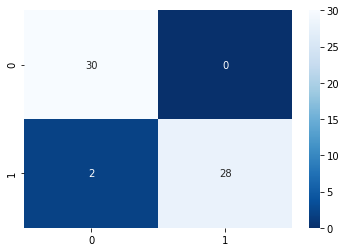

In [0]:
color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rai']
import seaborn as sn
sn.heatmap(cm, cmap=color[3], annot=True)

In [0]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_actual, y_test)

print(precision)
print(recall)

[0.5 1.  1. ]
[1.         0.93333333 0.        ]
